<h1><center>Исследование 
<br>
для интернет - магазина "Стримчик"</center></h1>

<h1><center>Цель:
<br>
<h10><center>выявить закономерности, влияющие на успешность игры

В моем распоряжении датасет с историческими данными о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования**
1. Изучение общей информации о датасете
2. Подготовка данных - типы данных, пропуски, дубликаты, названия столбцов, новые колонки
3. Исследовательский анализ
4. Составление портрета пользователя для конкретных регионов
5. Проверка гипотез
6. Общий вывод

# Изучение и предобработка

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('5.csv')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в нашем распоряжении 11 столбцов, 16715 строк. Встречаются типы данных object, float64. Заметны пропуски, названия столбцов не в snake_case. Исправим недочёты в данных. 

Для начала **переименуем столбцы**:

In [8]:
data.columns = data.columns.str.lower()

Поработаем с **типами данных**. Ниже список преобразований:
1. year_of_release -> int64, так как колонка хранит целые значения - год выпуска игры
2. user_score -> float64, так как колонка хранит дробные значения пользовательской оценки

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**Работа с пропусками**

In [10]:
data.name.isnull().sum()

2

In [11]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name есть два пропущенных значения. Посмотрев на них ближе, обнаруживается, что в этих строках пропущена почти вся необходимая для анализа информация, поэтому может их удалить. Год выпуска - 1993, что очень давно, наверное из - за этого нет данных об оценке - может в то время вообще не оценивали или по крайней мере не собирали данные об оценке

In [12]:
data = data[data['name'].isnull() != True]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [13]:
data.year_of_release.isnull().sum()

269

In [14]:
data[data['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Моё предложение по играм без даты выхода - заполнить им дату выхода средним по платформе, за исключением игр на ПК, так как консоли имеют поколения и сменяются каждые 6 - 7 лет, такое заполнение будет иметь хотя бы примерную точность, а вот с ПК так не выйдет, поэтому пропуски с платформой ПК удалим. Возможно пропуски в этом столбце появились из - за технической ошибки.

In [15]:
data = data[~((data['platform'] == 'PC') & (data['year_of_release'].isnull() == True))]

med_plat = data.groupby('platform')['year_of_release'].mean().astype('int')
for plat in data.platform.unique():
    data.loc[data.platform == plat, 'year_of_release'] = data.loc[data.platform == plat, 'year_of_release'].fillna(med_plat[plat])

Далее колонки critic_score, user_score и rating

In [16]:
data.rating.isnull().sum()

6764

In [17]:
data.critic_score.isnull().sum()

8575

In [18]:
data.user_score.isnull().sum()

9121

In [19]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Обратим внимание на то, что в столбце user_score были значения tbd, которые означают, что данные будут дополняться. В моем случае этих значений нет, так как при смене типа они превратились в Nan, что мне только на руку. Заполнять пропуски в столбцах user_score, critic_score, rating не будем, так как пропущенных значений очень много, а спрогнозировать их хотя бы грубо достаточно сложно.

Откуда могли взяться пропуски? Это могла быть техническая ошибка, но более вероятный вариант, что эти игры от инди - разработчиков, сделанные на коленке, и соотвественно не попадающие под взор больших критиков, и статистика пользовательской оценки по ним не собирается. А может быть это старые игры, и в момент их выхода не собиралась статистика по оценкам

Создадим столбец **суммарных продаж**

In [21]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Проверим на **дубликаты**

In [22]:
data.duplicated().sum()

0

Дубликатов нет, предобработка окончена

In [23]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16696 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16696 non-null  object 
 1   platform         16696 non-null  object 
 2   year_of_release  16696 non-null  Int64  
 3   genre            16696 non-null  object 
 4   na_sales         16696 non-null  float64
 5   eu_sales         16696 non-null  float64
 6   jp_sales         16696 non-null  float64
 7   other_sales      16696 non-null  float64
 8   critic_score     8121 non-null   float64
 9   user_score       7575 non-null   float64
 10  rating           9932 non-null   object 
 11  sum_sales        16696 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

In [24]:
data.rating = data.rating.fillna(0)

# Исследовательский анализ 

**1. Сколько игр выпускалось в разные годы?**

Построим график количества выпускаемых игр по годам.

In [25]:
game_year = data.groupby('year_of_release').agg(number_of_games = ('name', 'count'))

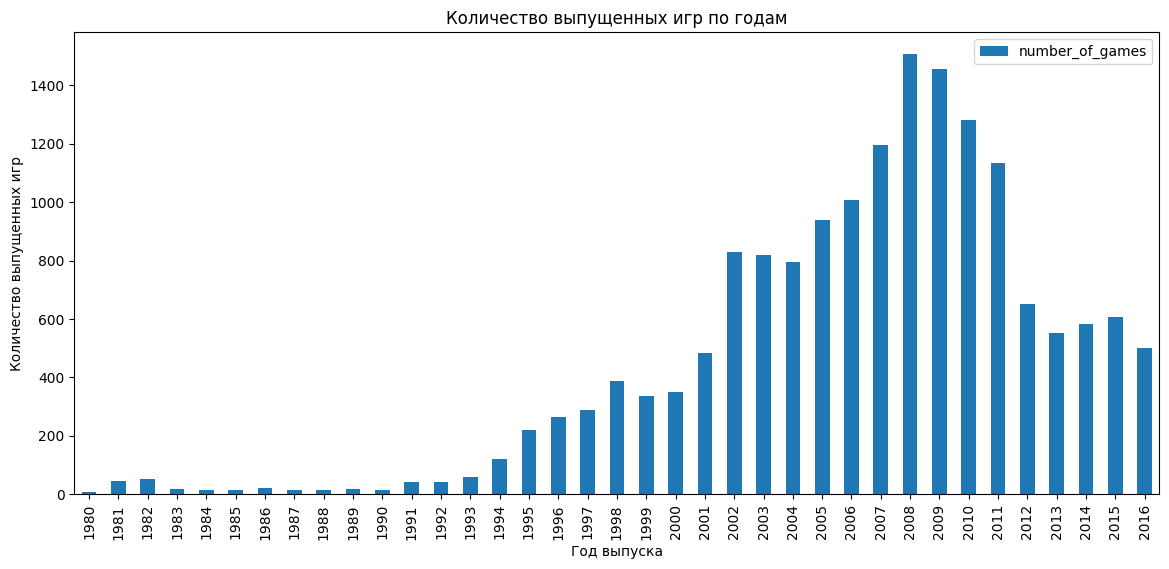

In [27]:
game_year.plot(kind='bar', figsize=(14, 6))
plt.xlabel(
    'Год выпуска')
plt.ylabel(
    'Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам');

Судя по гистограмме, пик выпуска пришел на 2008 - 2009 год, вышло около 1500 игр. Затем началось снижение, а в 2012 обвал. С 2012 по 2016 количество выпущенных игр было примерно одинаковым, то есть рынок стабилизировался. Нам явно не нужны данные за все периоды, так как игровой рынок меняется очень быстро и фактически живет циклами по 6 - 7 - 8 лет, до выпуска нового поколения консолей. Значит нам нужно выяснить какие консоли были самыми молодыми на момент 2016 года и по ним делать выводы.

**2. Продажи по платформам. Распределение продаж по годам.** 

Необходимо построить графики продаж по платформам и распределения продаж по годам для разных платформ.

In [28]:
sales_platform = data.groupby('platform').agg(sum_sales = ('sum_sales', 'sum')).sort_values(by='sum_sales')

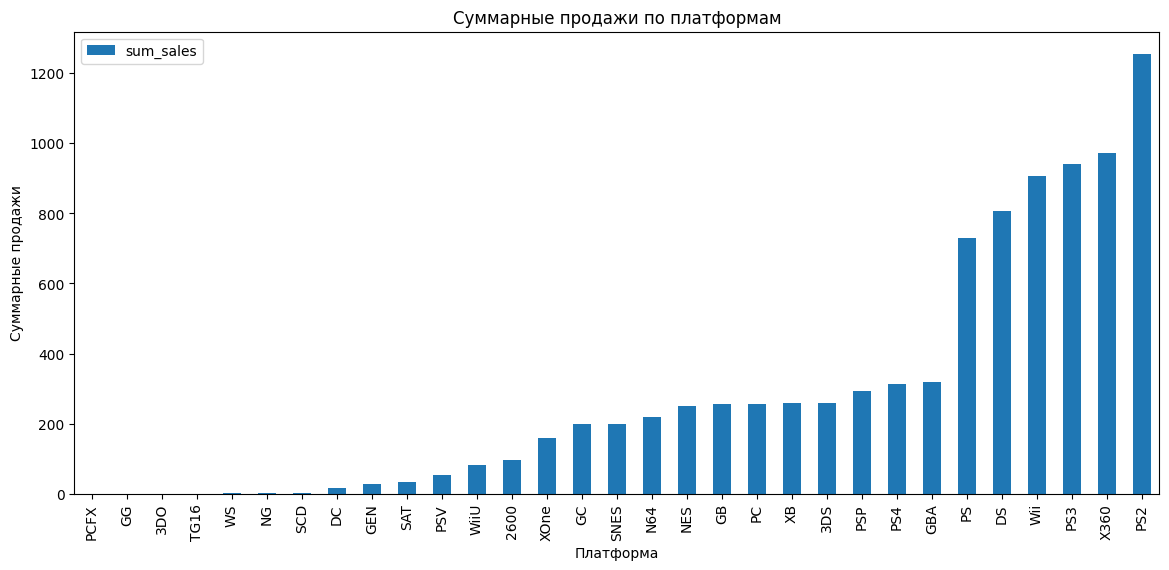

In [30]:
sales_platform.plot(kind='bar', figsize=(14, 6))
plt.xlabel(
    'Платформа')
plt.ylabel(
    'Суммарные продажи')
plt.title('Суммарные продажи по платформам');

Судя по графику распределения суммарных продаж за все время, самыми прибыльными платформами являются DS, PS, PS2, PS3, Wii, X360. Для них построим распределение продаж по годам. Сразу отбросим данные раньше 2000 года, будем считать это своеобразной точкой невозврата.

In [31]:
plat = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
data_part = data.query('platform in @plat and year_of_release > 2000')

In [32]:
plat_piv = pd.pivot_table(data_part, index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

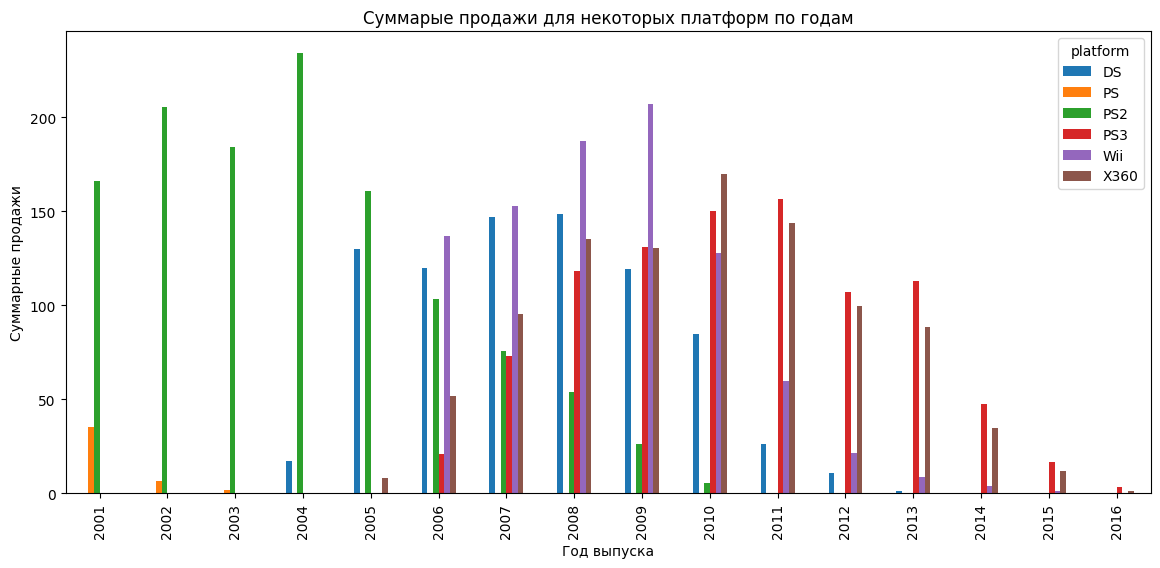

In [34]:
plat_piv.plot.bar(figsize=(14, 6))
plt.xlabel(
    'Год выпуска')
plt.ylabel(
    'Суммарные продажи')
plt.title('Суммарые продажи для некоторых платформ по годам');

На графике четко заметна закономерность: срок жизни одного поколения приставки около 8 - 10 лет. Так, X360 был популярен с 2006 по 2016, PS3 и Wii - с 2006 по 2015, DS - с 2004 по 2013. И четко заметно, что выбранные нами платформы уже уходят в прошлое, именно поэтому у них самые большие суммарные продажи. 

**3. Выбор актуального периода.**

Так как компьютерные игры - очень динамично меняющаяся ниша, то интервал для анализа стоит взять очень небольшой, я склоняюсь к 3 годам. То есть берём данные с 2013 года.

In [35]:
data = data[data['year_of_release'] >= 2013]

**4. Выбор потенциально прибыльных платформ.**

Нужно оценить продажи платформ за актуальный период и выбрать наиболее перспективные.

In [36]:
perspective_plat = pd.pivot_table(data, index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

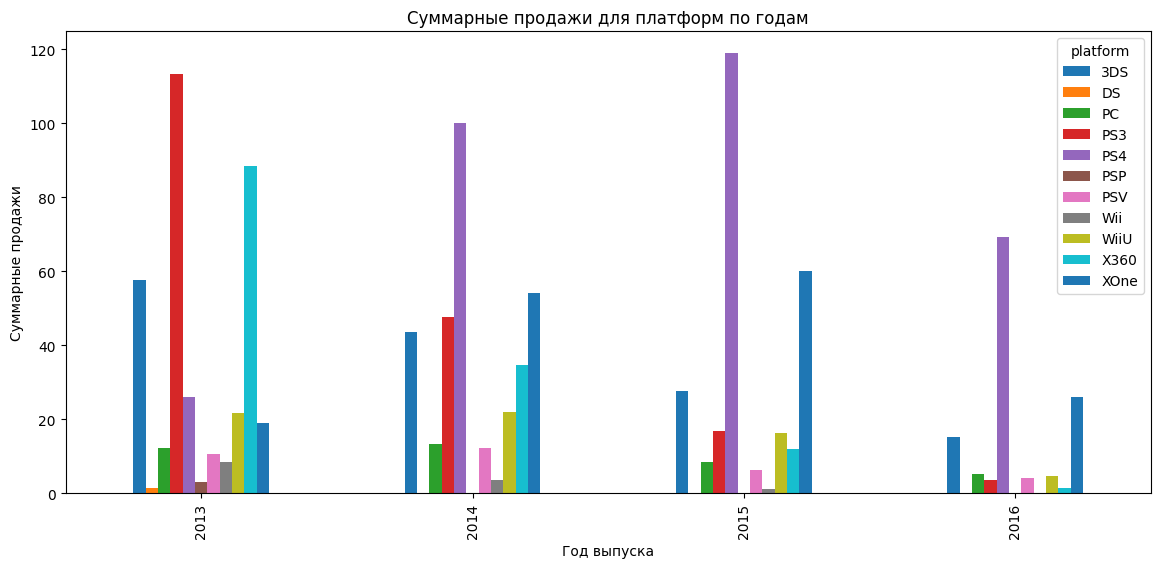

In [38]:
perspective_plat.plot(kind='bar', figsize=(14, 6))
plt.xlabel(
    'Год выпуска')
plt.ylabel(
    'Суммарные продажи')
plt.title('Суммарные продажи для платформ по годам');

Итак, самыми перспективными являются PS4 и XOne, они на момент 2016 года еще даже не на пике. В качестве третьего варианта можно рассмотреть 3DS, но эта платформа уже явно погибает и в перспективе года - двух совсем исчезнет из инфополя, поэтому не будем брать ее в расчёт.

**5. Изучение глобальных продаж игр в разбивке по платформам при помощи "ящиков с усами".**

Необходимо построить "ящики с усами" для глобальных продаж в разбиве по платформам.

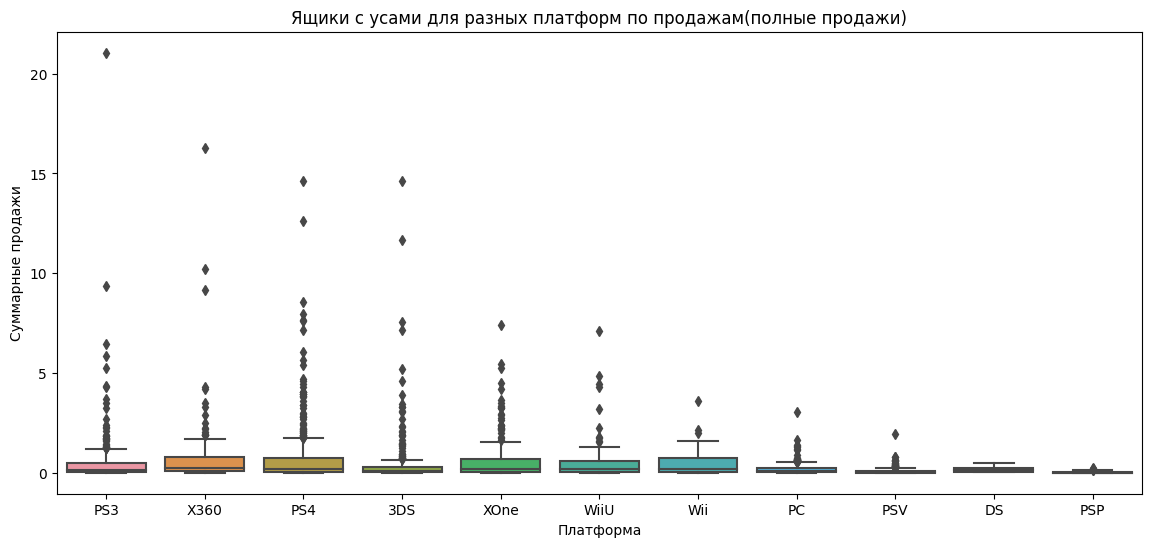

In [40]:
fig = plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='platform', 
            y='sum_sales',
           data=data)
#ax.set_ylim(0, 4)
plt.xlabel(
    'Платформа')
plt.ylabel(
    'Суммарные продажи')
plt.title('Ящики с усами для разных платформ по продажам(полные продажи)');

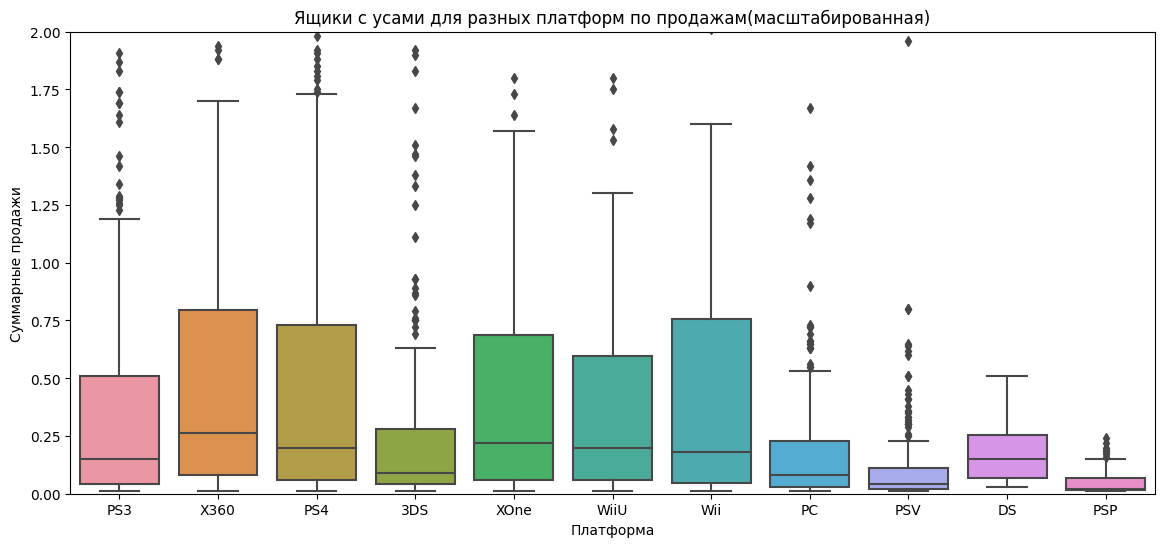

In [41]:
fig = plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='platform', 
            y='sum_sales',
           data=data)
ax.set_ylim(0, 2)
plt.xlabel(
    'Платформа')
plt.ylabel(
    'Суммарные продажи')
plt.title('Ящики с усами для разных платформ по продажам(масштабированная)');

У всех платформ бывали выбросы. Почти у всех платформ наблюдается негативная скошенность(вправо). Такую же скошенность можно было наблюдать на графике количества выпущенных игр по годам. У PS4 и Xbox One графики практически идентичны: медианы и и верхние квартили равны, но вот выбросов больше у PS4, об этом свидетельствует размах усов. 

**6. Взаимосвязь продаж игры и оценок пользователей и критиков.**

Необходимо определить существует ли связь между оценками(пользователей и критиков) и продажами игры. 

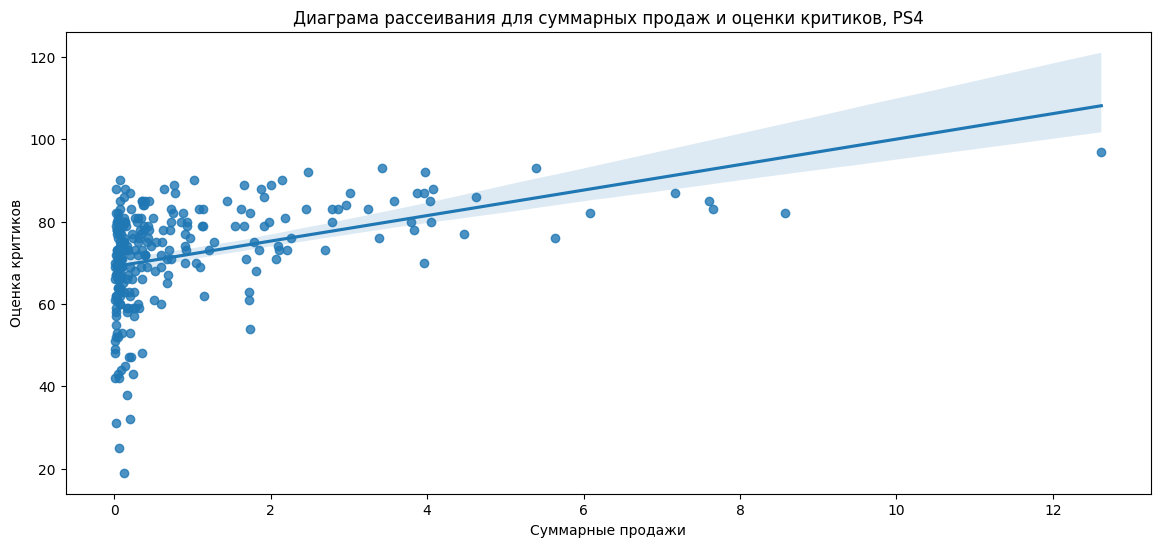

In [43]:
fig = plt.figure(figsize=(14, 6))
sns.regplot(
    x='sum_sales',
    y='critic_score',
    data=data[data.platform == 'PS4'],
)
plt.xlabel(
    'Суммарные продажи')
plt.ylabel(
    'Оценка критиков')
plt.title('Диаграма рассеивания для суммарных продаж и оценки критиков, PS4');

Для PS4 заметна положительная корреляция с оценкой критиков, но не сильная

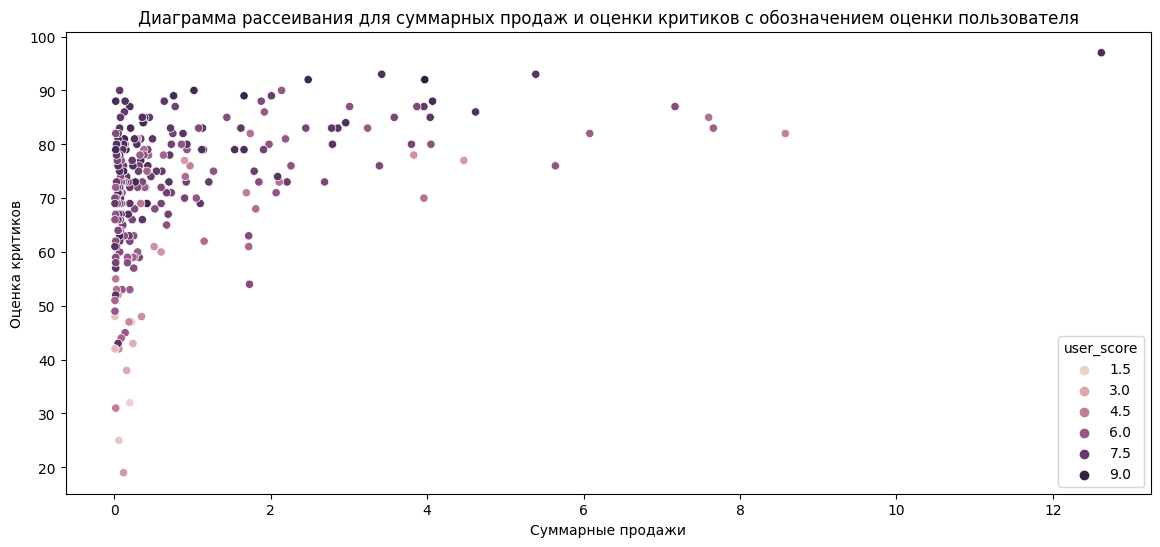

In [45]:
fig = plt.figure(figsize=(14, 6))
sns.scatterplot(
    x='sum_sales',
    y='critic_score',
    data=data[data.platform == 'PS4'],
    hue='user_score'
)
plt.xlabel(
    'Суммарные продажи')
plt.ylabel(
    'Оценка критиков')
plt.title('Диаграмма рассеивания для суммарных продаж и оценки критиков с обозначением оценки пользователя');

А вот с оценкой пользователей корреляция слабее, много игр с маленькими продажами и большим рейтингом от игроков

In [46]:
data[data.platform == 'PS4'][['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Матрица корреляции подтвердила предположения. Корреляция с оценкой критиков велика - 0.4, а вот с оценкой пользователей близка к 0.

**7. Соотнесение полученных данных о корреляции с продажами на других платформах.**

Проведём те же манипуляции для ряда других платформ: XOne, 3DS, PC, PS3, X360.

Матрица корреляции для  XOne

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.068925      0.416998
user_score    -0.068925    1.000000      0.472462
critic_score   0.416998    0.472462      1.000000



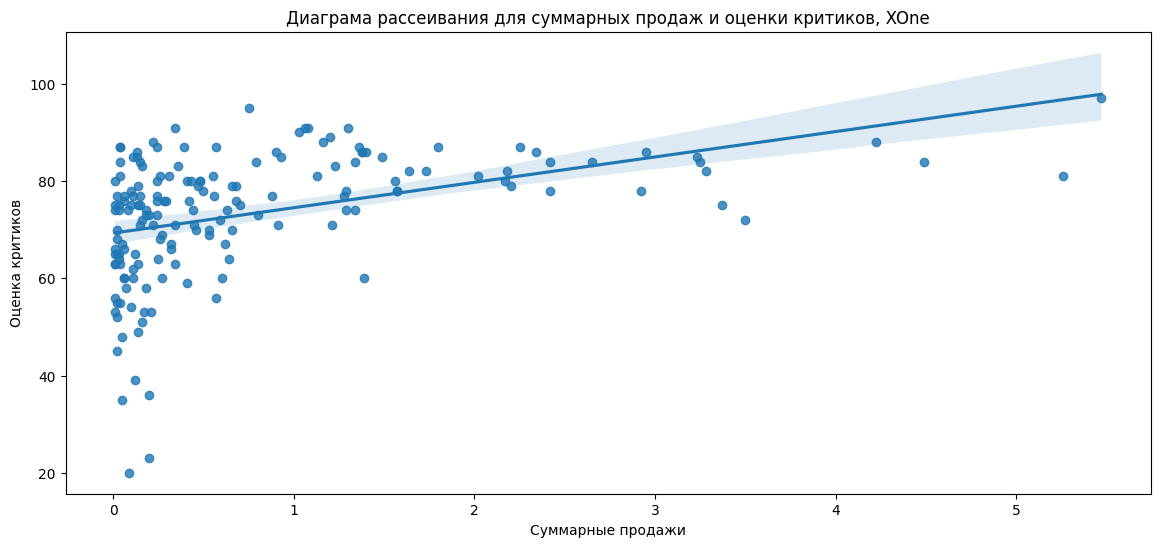

Матрица корреляции для  3DS

              sum_sales  user_score  critic_score
sum_sales      1.000000    0.250366      0.361008
user_score     0.250366    1.000000      0.767946
critic_score   0.361008    0.767946      1.000000



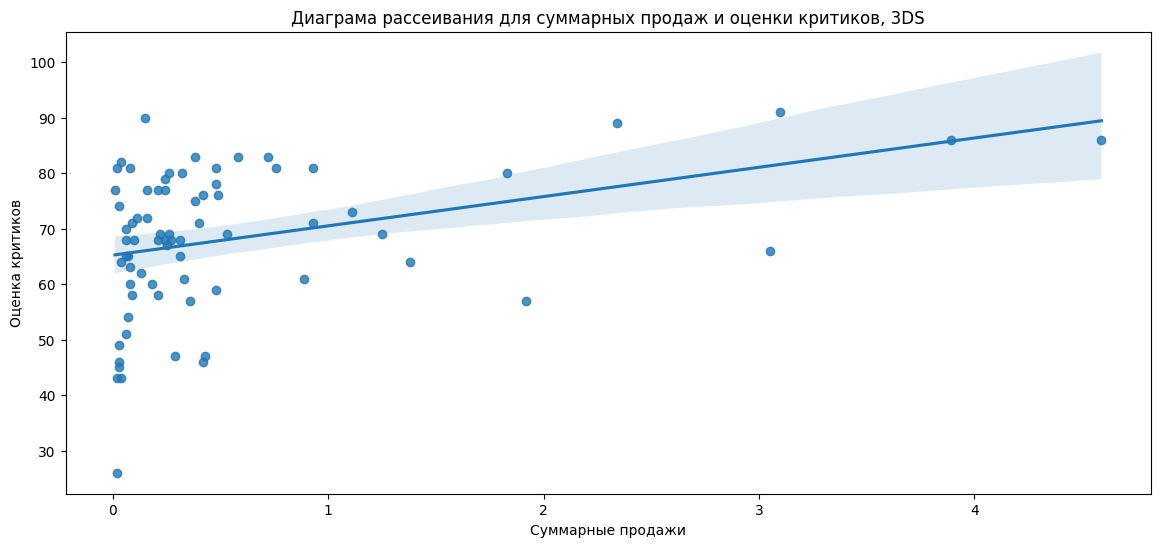

Матрица корреляции для  PC

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.093842      0.196030
user_score    -0.093842    1.000000      0.429562
critic_score   0.196030    0.429562      1.000000



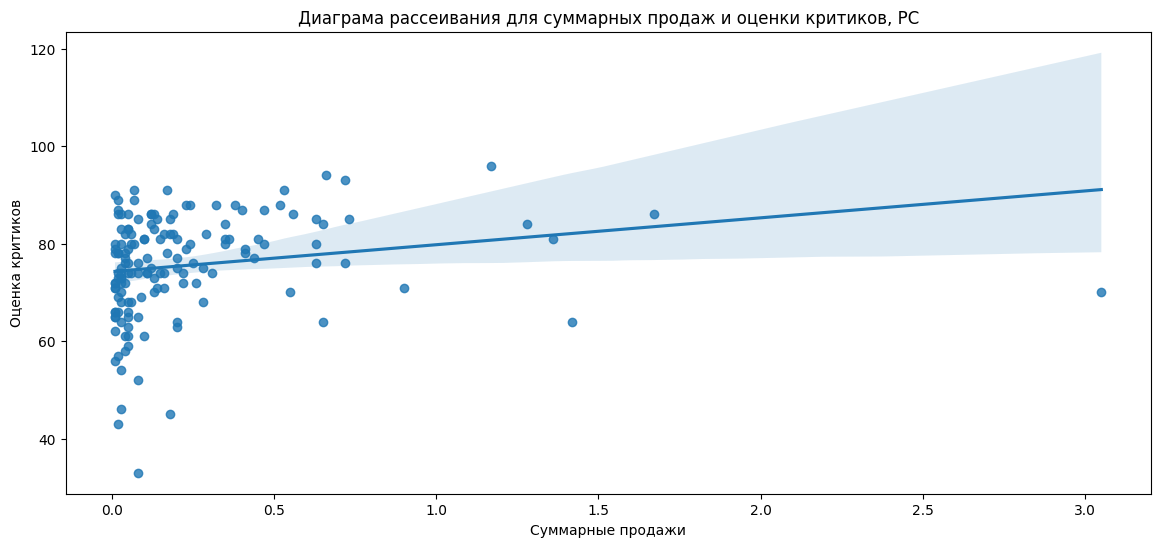

Матрица корреляции для  PS3

              sum_sales  user_score  critic_score
sum_sales      1.000000    0.002394      0.334285
user_score     0.002394    1.000000      0.599920
critic_score   0.334285    0.599920      1.000000



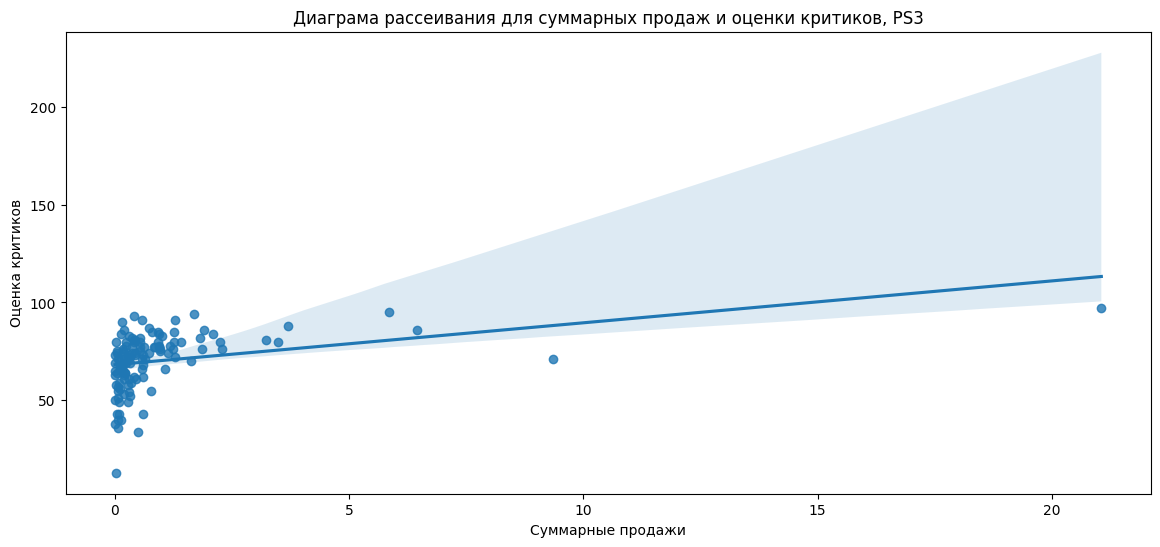

Матрица корреляции для  X360

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.011742      0.350345
user_score    -0.011742    1.000000      0.520946
critic_score   0.350345    0.520946      1.000000



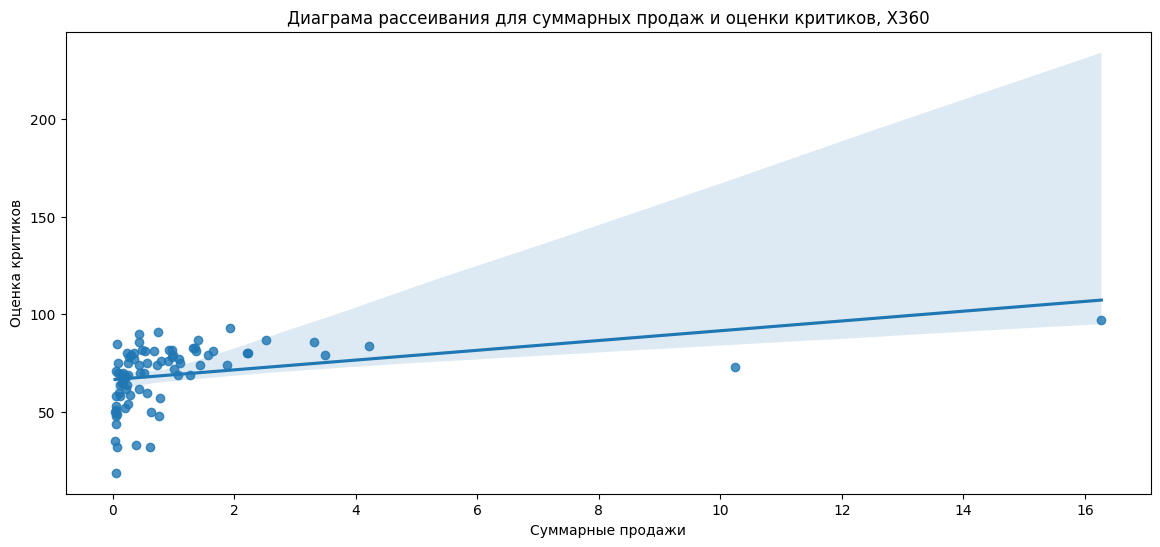

In [47]:
plats = ['XOne', '3DS', 'PC', 'PS3', 'X360']
for plat in plats:
    fig = plt.figure(figsize=(14, 6))
    sns.regplot(
        x='sum_sales',
        y='critic_score',
        data=data[data.platform == plat],
    )
    plt.xlabel(
        'Суммарные продажи')
    plt.ylabel(
        'Оценка критиков')
    plt.title('Диаграма рассеивания для суммарных продаж и оценки критиков, ' + plat)
    print('Матрица корреляции для ', plat)
    print()
    print(data[data.platform == plat][['sum_sales', 'user_score', 'critic_score']].corr())
    print()
    plt.show()

Для XOne результат практически идентичный: корреляция с критиками - 0.41, с пользователями близка к 0.

Для 3DS корреляция с критиками - 0.36, с пользователями 0.25

Для PC корреляция с критиками - 0.19, с пользователями -0.09

Для PS3 корреляция с критиками - 0.33, с пользователями близка к 0

Для X360 корреляция с критиками - 0.35, с пользователями близка к 0

Таким образом, положительная корреляция с оценкой критиков заметна для всех платформ, а какая - либо корреляция с пользовательской оценкой заметна лишь на одной из 6 платформ - 3DS.

**8. Изучения распределения игр по жанрам. Прибыльность жанров.** 

In [48]:
genre = data.groupby('genre')['name'].count().sort_values()

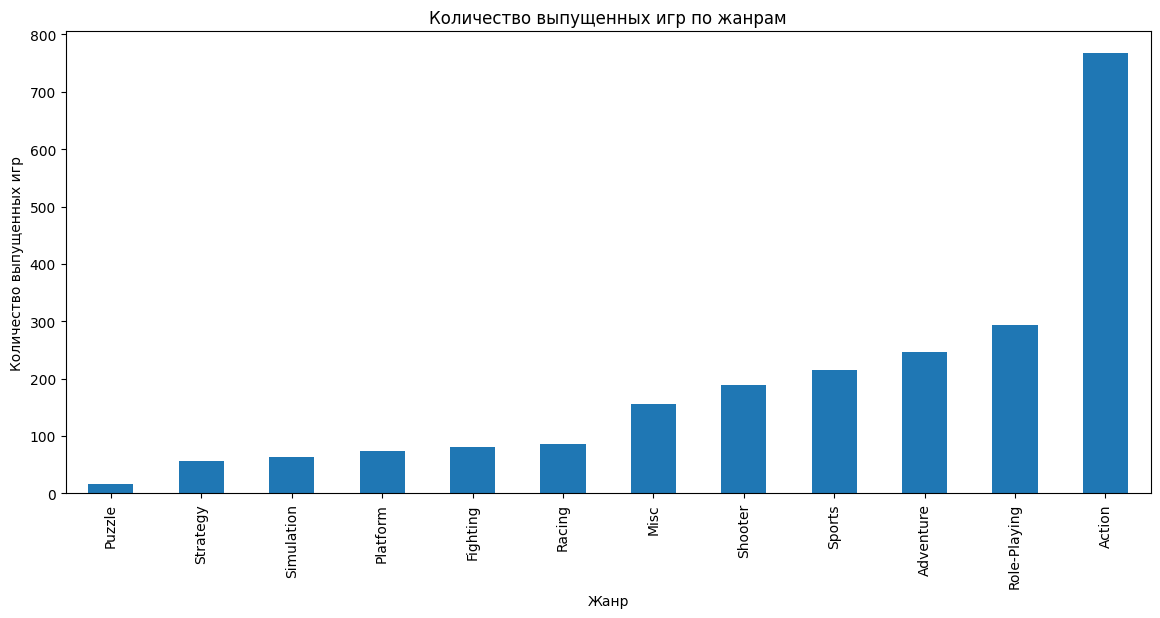

In [50]:
genre.plot(kind='bar', figsize=(14, 6))
plt.xlabel(
    'Жанр')
plt.ylabel(
    'Количество выпущенных игр')
plt.title('Количество выпущенных игр по жанрам');

Абсолютное большинство игр в жанре Action, также можно выделить Shooter, Adventure, Sports и Role-Playing

Так как продажи одного и того жанра на разных платформы могут разниться очень сильно, то для поиска оптимального и стабильного жанра будем оценивать медианное количество проданных копий.

In [51]:
genre_sales = pd.pivot_table(data, index='genre', columns='platform', values='sum_sales', aggfunc='median')
genre_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,0.070,0.250,0.060,0.165,0.155,0.055,0.04,0.035,0.140,0.250,0.150
Adventure,0.065,0.030,0.030,0.050,0.070,0.020,0.02,0.180,0.070,0.075,0.060
Fighting,0.080,NaN,0.050,0.130,0.170,0.020,0.10,NaN,0.600,0.220,0.200
Misc,0.080,0.080,0.020,0.110,0.075,0.020,0.06,0.230,0.190,0.310,0.180
Platform,0.240,0.345,0.035,0.250,0.300,NaN,0.03,1.125,0.580,0.110,0.160
Puzzle,0.100,NaN,NaN,0.040,0.020,NaN,0.03,NaN,0.060,NaN,NaN
Racing,0.090,NaN,0.030,0.120,0.230,NaN,0.04,NaN,3.680,0.195,0.185
Role-Playing,0.170,NaN,0.090,0.120,0.200,0.130,0.07,NaN,0.410,0.490,0.320
Shooter,0.065,NaN,0.210,0.410,0.970,NaN,0.72,NaN,0.115,0.365,1.095


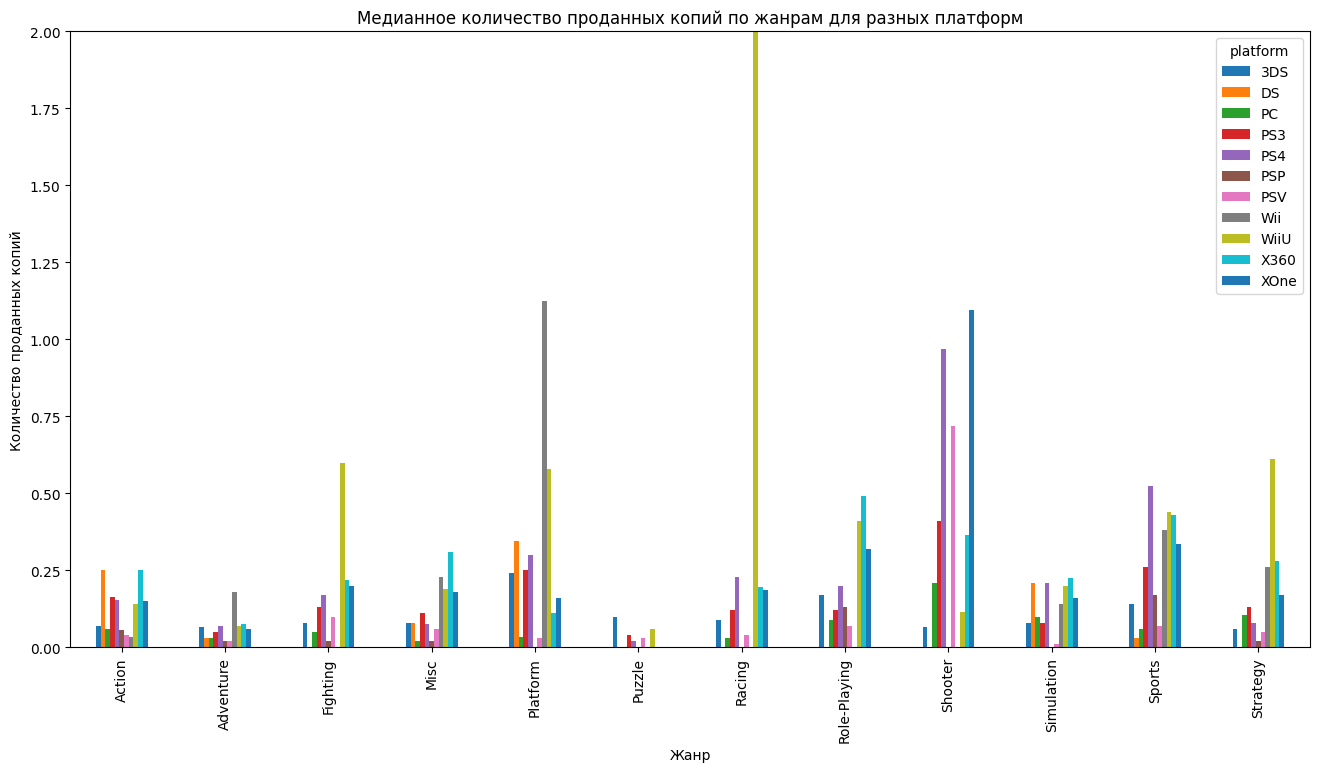

In [53]:
ax = genre_sales.plot(kind='bar', figsize=(16, 8))
ax.set_ylim(0, 2)
plt.xlabel(
    'Жанр')
plt.ylabel(
    'Количество проданных копий')
plt.title('Медианное количество проданных копий по жанрам для разных платформ');

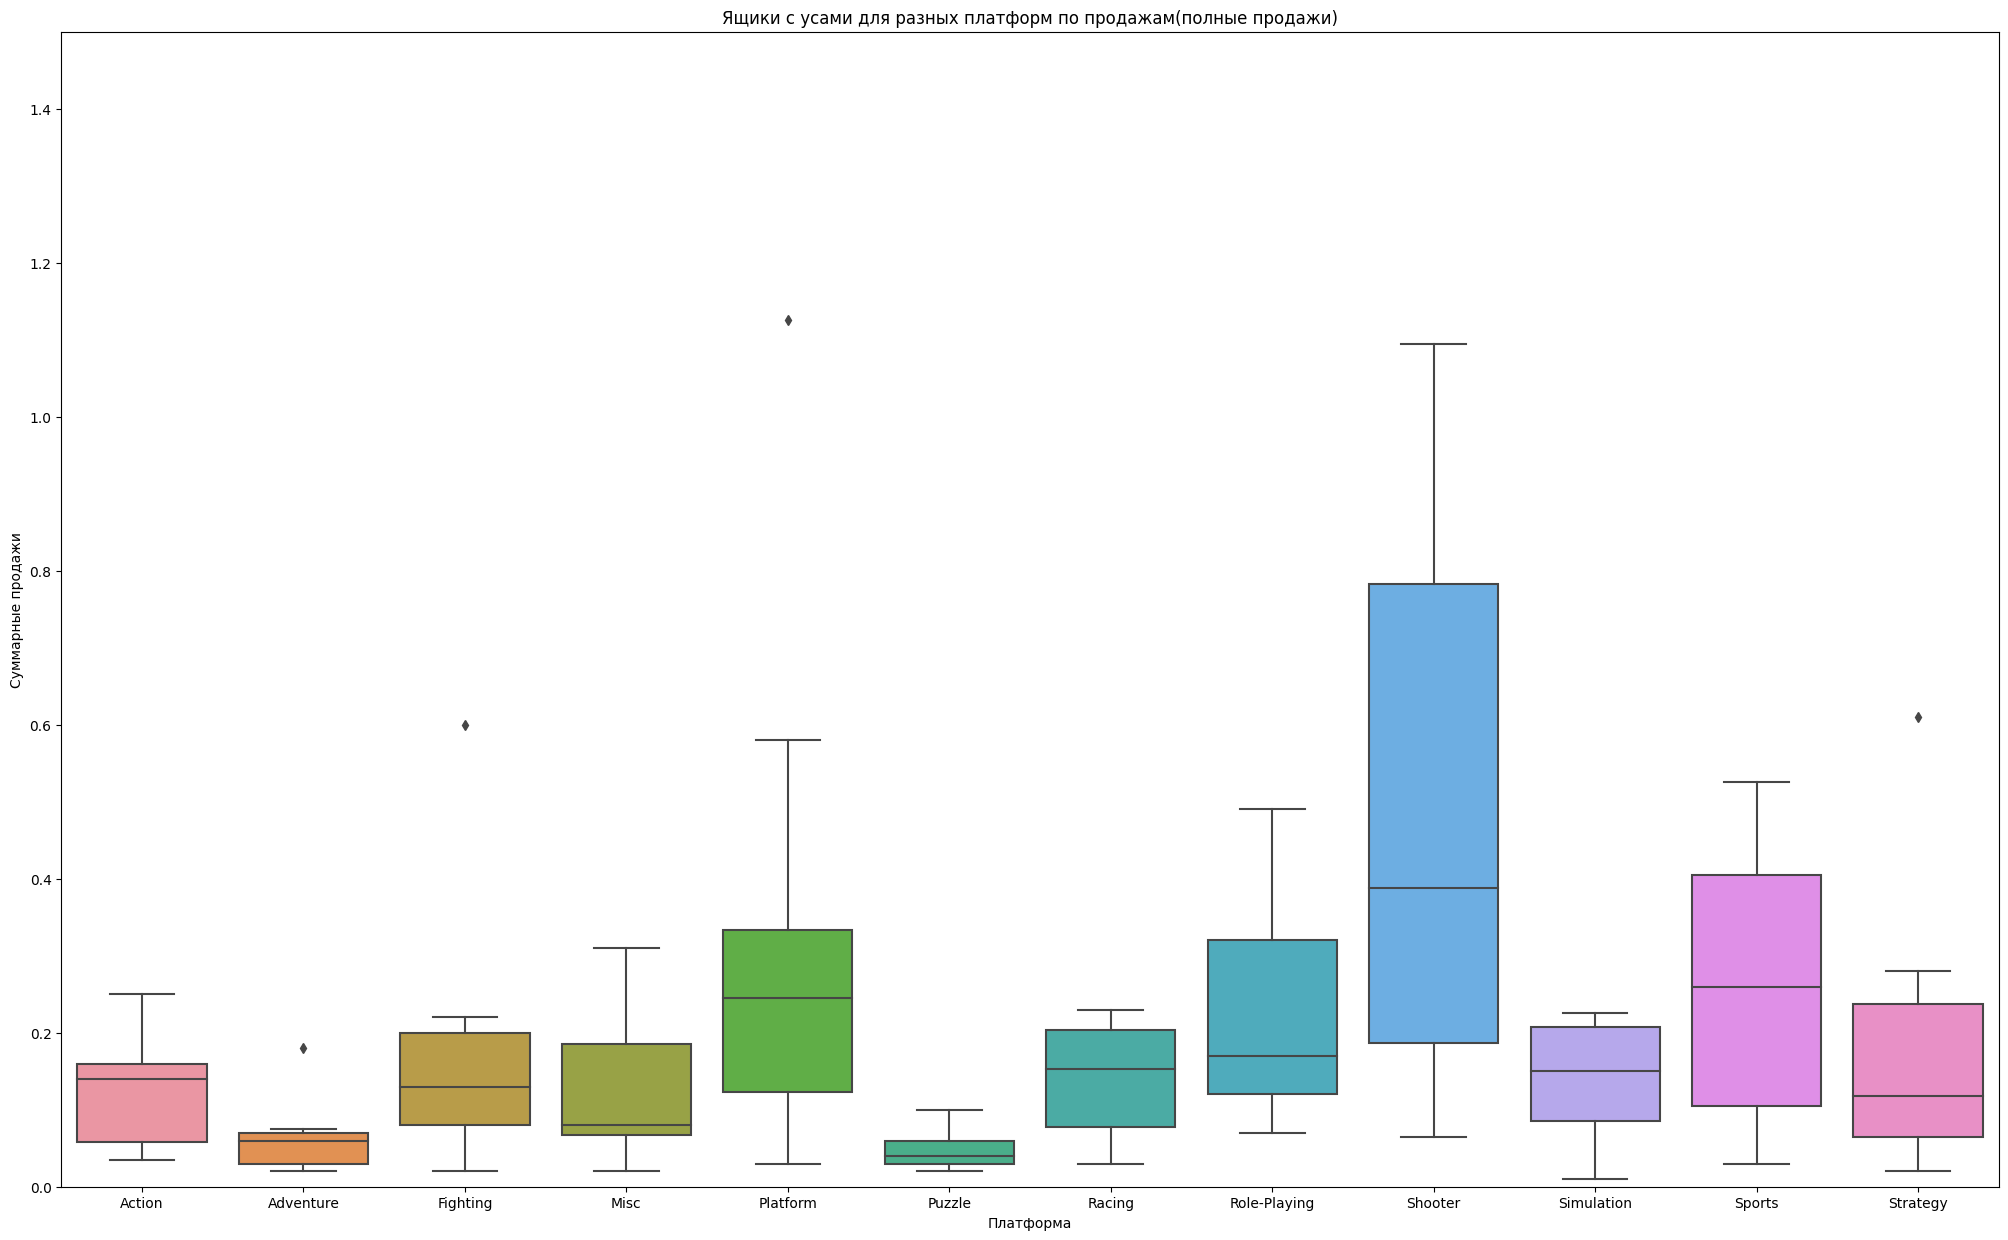

In [54]:
fig = plt.figure(figsize=(25, 15))
ax = sns.boxplot(data=genre_sales.T)
ax.set_ylim(0, 1.50)
plt.xlabel(
    'Платформа')
plt.ylabel(
    'Суммарные продажи')
plt.title('Ящики с усами для разных платформ по продажам(полные продажи)');

При помощи графиков выделим самые стабильные и прибыльные жанры:
1. **Shooter**
2. **Sports**
3. **Platform**

**Вывод**

Итак, в ходе исследовательского анализа удолось выявить:

- Нас интересуют данные только после 2013 года

- Самые перспективные платформы - PS4 и XOne

- Выявлена положительная корреляция между оценкой критиков и продажами игры, а вот между пользовательской оценкой и продажами корреляции нет

- Большиснтво выпускаемых игр в жанре Actio. Однако самые стабильные и прибыльные жанры: Shooter, Sports, Platform

# Портрет пользователя каждого региона

**1. Топ-5 самых популярных платформ по регионам**

In [55]:
region = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

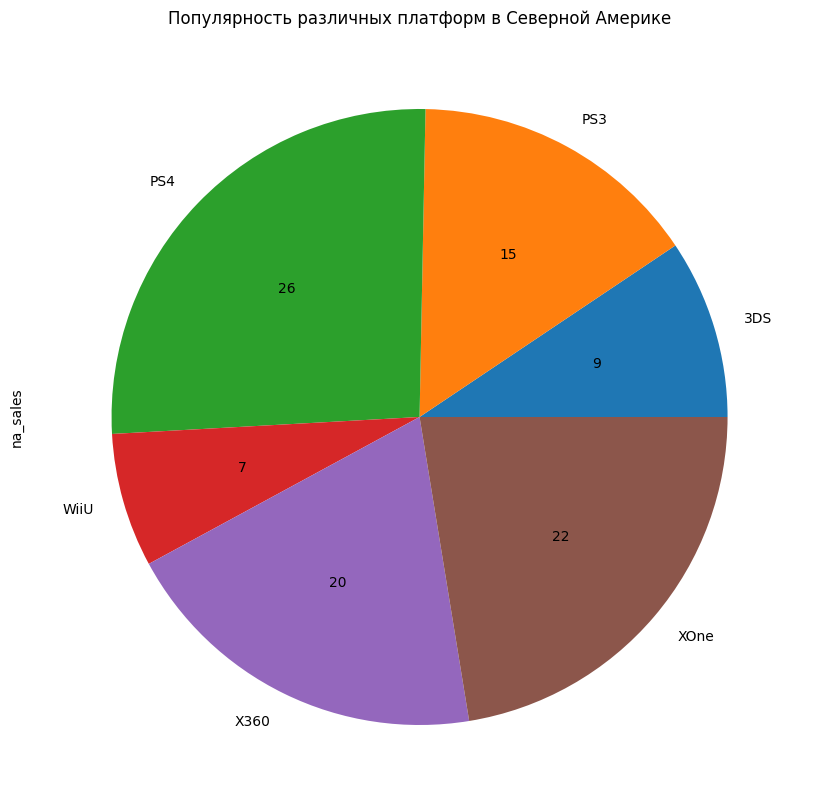

In [57]:
region[region.na_sales > 15]['na_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных платформ в Северной Америке');

Топ 5 самых популярных платформ в Северной Америке по количеству проданных копий игр:
1. PS4 - 26%
2. XOne - 22%
3. X360 - 20%
4. PS3 - 15%
5. 3DS - 9%


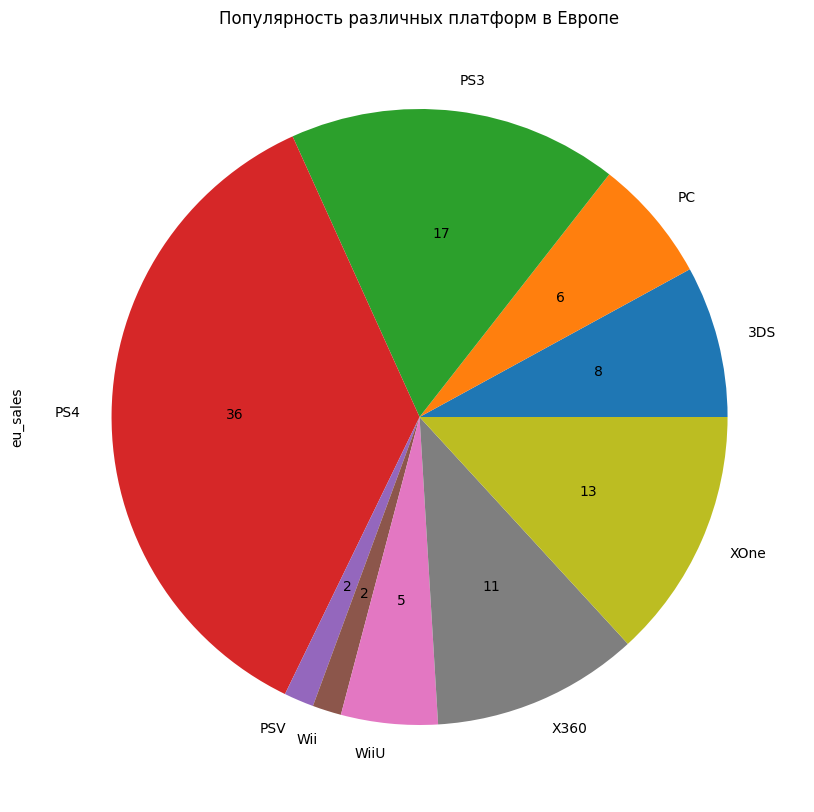

In [58]:
region[region.eu_sales > 5]['eu_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных платформ в Европе');

Топ 5 самых популярных платформ в Европе по количеству проданных копий игр:
1. PS4 - 36%
2. PS3 - 17%
3. XOne - 13%
4. X360 - 11%
5. 3DS - 8%


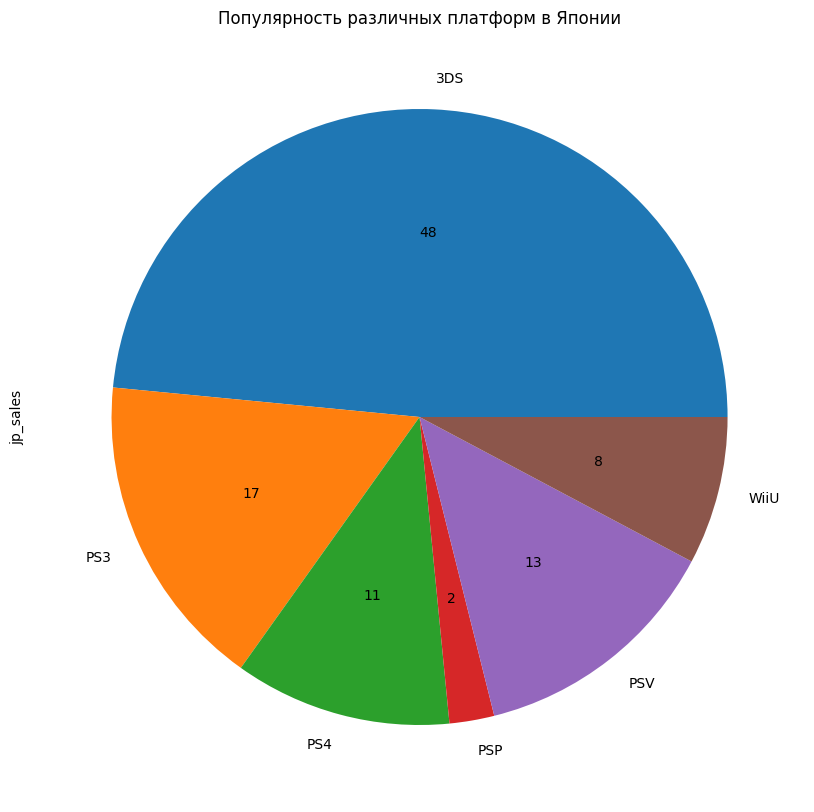

In [59]:
region[region.jp_sales > 2]['jp_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных платформ в Японии');

Топ 5 самых популярных платформ в Японии по количеству проданных копий игр:
1. 3DS - 48%
2. PS3 - 17%
3. PSV - 13%
4. PS4 - 11%
5. WiiU - 8%


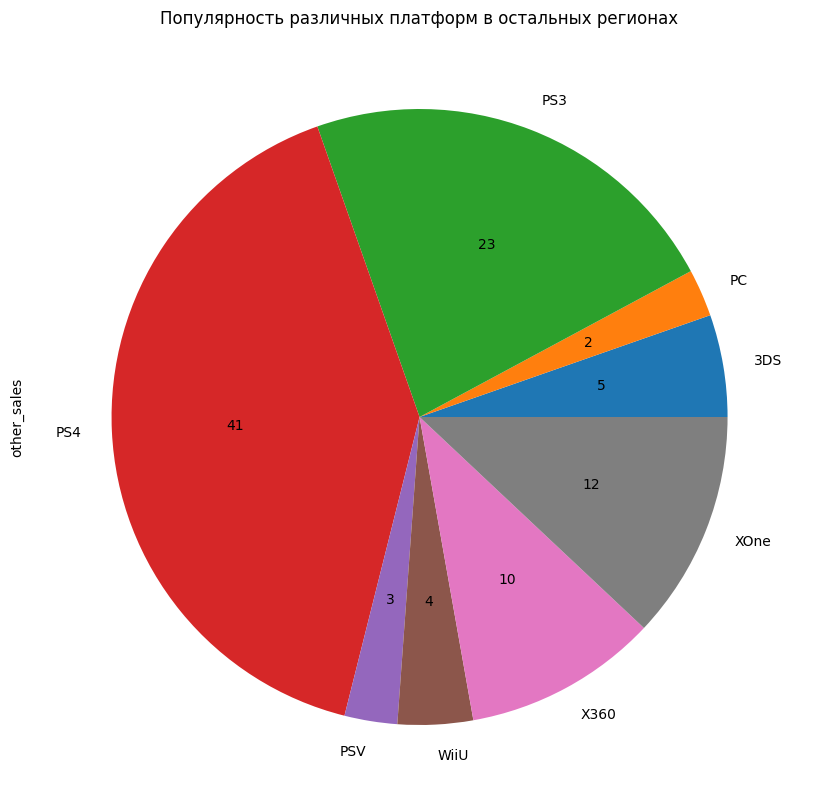

In [60]:
region[region.other_sales > 2]['other_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных платформ в остальных регионах');

Топ 5 самых популярных платформ в остальных регионах по количеству проданных копий игр:
1. PS4 - 41%
2. PS3 - 23%
3. XOne - 12%
4. X360 - 10%
5. 3DS - 5%

Получается, что в Северной Америке, Европе и остальных регионах пользователи предпочитают PS4, а в Японии - 3DS.

**2. Топ-5 жанров по регионам**

In [61]:
user_genre = data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

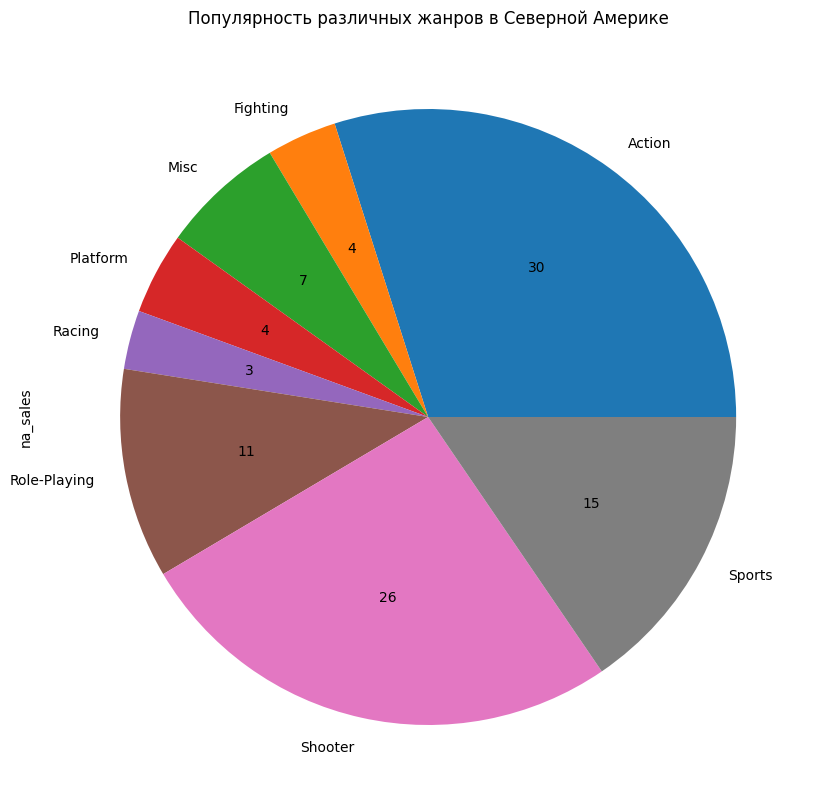

In [63]:
user_genre[user_genre.na_sales > 10]['na_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных жанров в Северной Америке');

Топ 5 самых популярных жанров в Северной Америке по количеству проданных копий игр:
1. Action - 30%
2. Shooter - 26%
3. Sports - 15%
4. Role-Playing - 11%
5. Misc - 7%

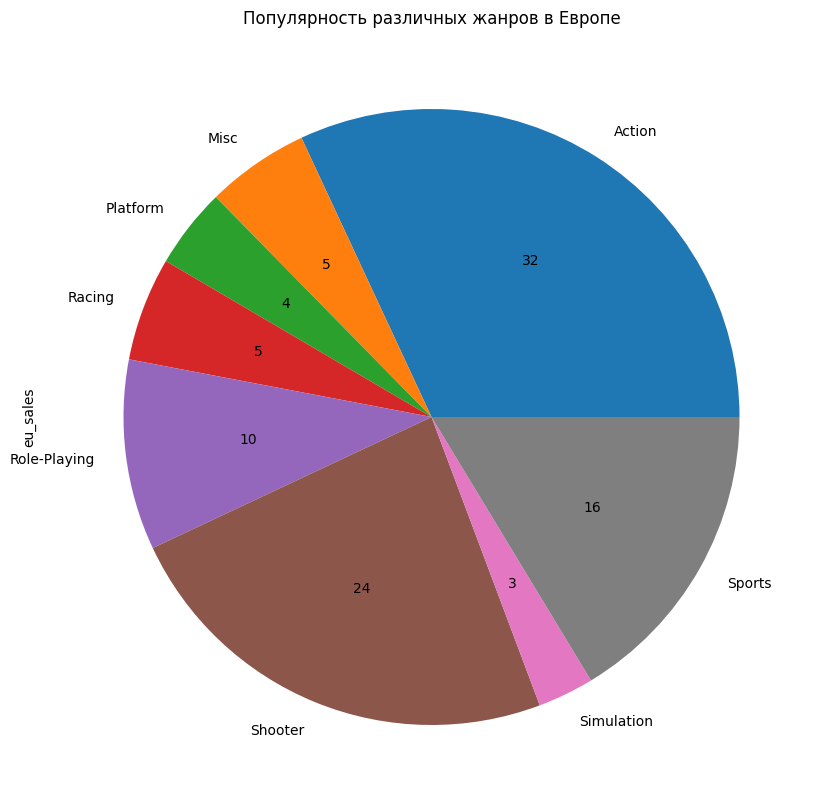

In [64]:
user_genre[user_genre.eu_sales > 10]['eu_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных жанров в Европе');

Топ 5 самых популярных жанров в Европе по количеству проданных копий игр:
1. Action - 32%
2. Shooter - 24%
3. Sports - 16%
4. Role-Playing - 10%
5. Misc и Racing - 5%

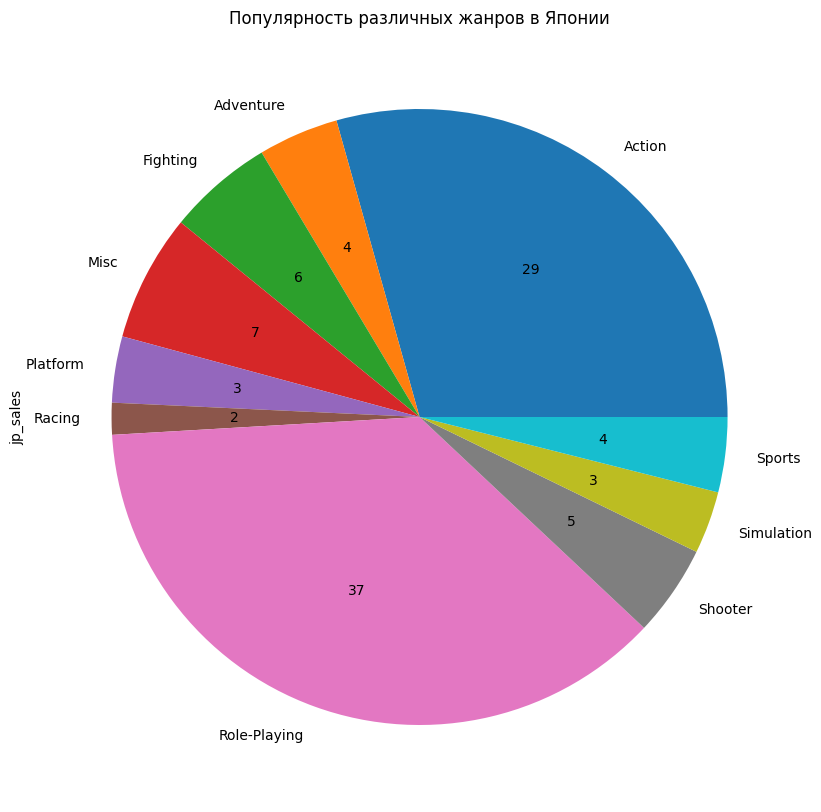

In [65]:
user_genre[user_genre.jp_sales > 2]['jp_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных жанров в Японии');

Топ 5 самых популярных жанров в Японии по количеству проданных копий игр:
1. Role-Playing - 37%
2. Action - 29%
3. Misc - 7%
4. Fighting - 6%
5. Shooter - 5%

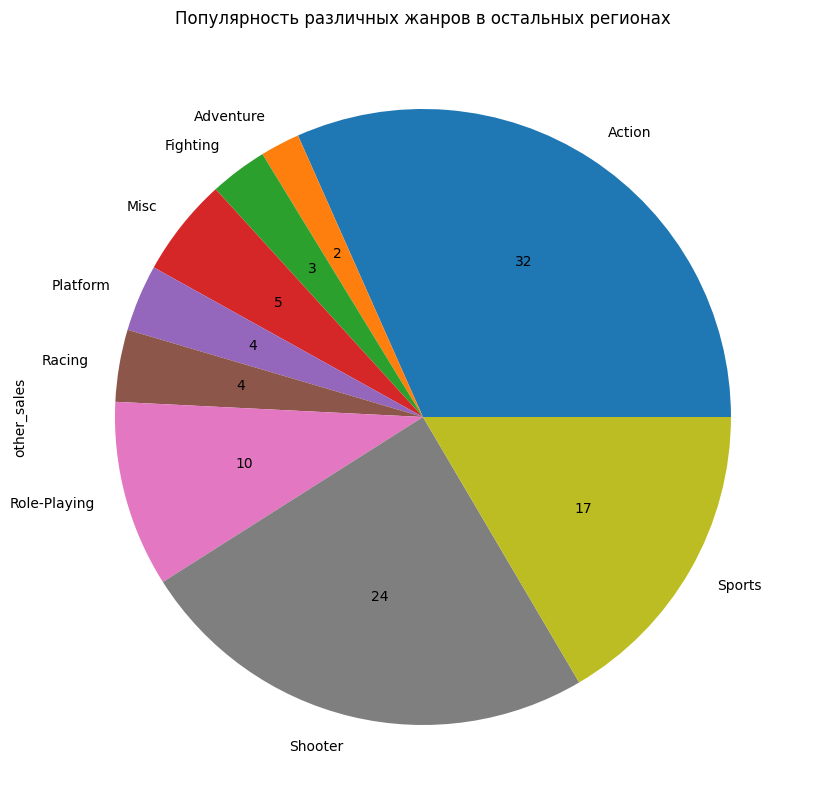

In [66]:
user_genre[user_genre.other_sales > 2]['other_sales'].plot.pie(autopct="%.0f", figsize=(20, 10))
plt.title('Популярность различных жанров в остальных регионах');

Топ 5 самых популярных жанров в остальных регионах по количеству проданных копий игр:
1. Action - 32%
2. Shooter - 24%
3. Sports - 17%
4. Role-Playing - 10%
5. Misc - 5%

Заметно, что и в Северной Америке, и в Европе, и в остальных регионах популярны одни и те же жанры, причем пропорции, в которых эти данные делят рынок, одинаковы для всех перечисленных регионов. Лидирует жанр Action, который оказался самым крупным по кличеству выпущенных игр, затем Shooter, замыкает тройку лидеров Sports. Совсем противоположная ситуация в Японии: здесь список жанров иной, при этом на первом месте Role-Playing, который занимает треть рынка. Однако и здесь Action находится высоко в топе и занимает 30% рынка. Также у японцев слабопопулярны шутеры, что не характерно больше ни для какого региона.

**3. Влияние рейтинга ESRB на продажи в отдельном регионе**

In [67]:
data.rating.unique()

array(['M', 0, 'E', 'T', 'E10+'], dtype=object)

In [68]:
rating_data = data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

<Figure size 1800x1000 with 0 Axes>

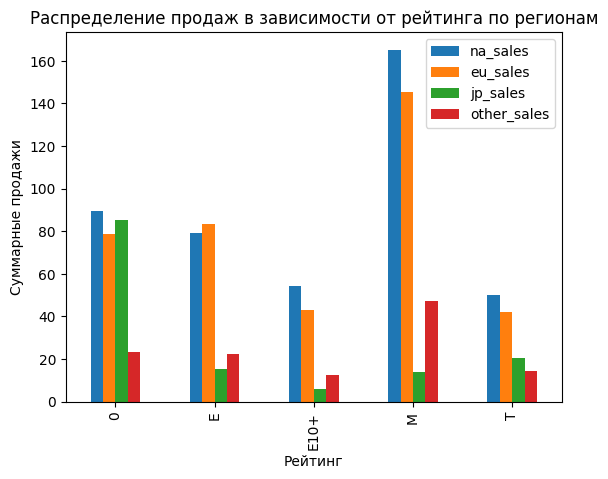

In [71]:
plt.figure(figsize=(18, 10))
rating_data.plot(kind='bar')
plt.xlabel(
    'Рейтинг')
plt.ylabel(
    'Суммарные продажи')
plt.title('Распределение продаж в зависимости от рейтинга по регионам');

В Северной Америке,Европе и остальных регионах наибольшую прибыль собирают игры с рейтингом "M"(17+). А вот в Японии ситуация такова, что основная часть продаж приходится на игры без рейтинга, причем эта часть сильно больше остальных частей. Можно сделать вывод, что во всех регионах, кроме Японии, есть смысл опираться на рейтинг, в Японии в этом нет смысла.

**Вывод**

В этом разделе удалось выявить портрет пользователя для каждого региона.*

*1. Северная Америка*

В этом региона четверть пользователей консолей - владельцы PS4, чуть меньше пользователей XOne - 22%, X360 используют 20%, PS3 - 15%, а 5% используют 3DS.

*2. Европа*

В этом регионе пользователи больше предпочитают PS4 - ей владеют 36%, 17% - обладатели PS3, XOne используют 13%, X360 - 11%, а 8% - 3DS.

*3. Остальные регионы*

41% пользователей владеют PS4, 23% - PS3, 12% - XOne, 10% - X360, а 3DS владеют всего 4%.

Во всех вышеперечисленных регионах предпочитают одни и те же жанры: Action, Sports, Shooter, Misc, Role-Playing. Также преобладают одни и те же возрастные ограничения: на первом месте M(17+), затем E(без ограничений), однако игры без рейтинга тоже достаточно популярны.

Таким образом, для Северной Америки, Европы или остальных регионов портрет пользователя выглядит так: 

Платформа: Xbox One или PS4

Жанры: Action, Shooter

Возрастное ограничение: M или без рейтинга

*4. Япония*

Население Японии предпочитает 3DS - 48% пользователей владеют именно ей, PS3 - 17%, PSV - 13%, PS4 - 11%, WiiU - 8%. Любимые жанры - Role-Playing, Action, Misc, Sports, Platform. Принципиальное отличие в рейтинге: так как в Японии этот рейтинг не проставляют, то рейтинг в этом регионе не играет никакой роли.

Портрет пользователя для Японии: 

Платформа: 3DS

Жанры: Role-Playing, Action

Возрастное ограничение: без рейтинга

Откуда такие различия между Японией и остальным миром? Вероятно это связано с культурными отличиями.

# Проверка гипотез

**1. Средние пользовательские рейтинги Xbox One и PC одинаковые**

Сформулируем гипотезы:

H0: средний рейтинг пользователей Xbox One = средний рейтинг пользователей PC

Н1: средний рейтинг пользователей Xbox One ≠ средний рейтинг пользователей PC

alpha = 0.05

In [72]:
from scipy import stats as st
import numpy as np

alpha = 0.05

results = st.ttest_ind(
    data[data.platform == 'XOne']['user_score'].dropna(), 
    data[data.platform == 'PC']['user_score'].dropna(),
    equal_var=False
)

print('p-значение:', results.pvalue)

p-значение: 0.14759594013430463


p-значение достаточно велико, поэтому не можем откинуть нулевую гипотезу. Значит гипотеза подтвердилась, средний рейтинг пользователей Xbox One и PC совпадают. 

Проверим:

In [73]:
print('Средняя пользовательская оценка игр для XOne:', data[data.platform == 'XOne']['user_score'].mean())
print('Средняя пользовательская оценка игр для PC:', data[data.platform == 'PC']['user_score'].mean())

Средняя пользовательская оценка игр для XOne: 6.521428571428572
Средняя пользовательская оценка игр для PC: 6.269677419354839


Действительно сопадают.

**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Сформулируем гипотезы:

H0: средний рейтинг пользователей жанра Action = средний рейтинг пользователей жанра Sports

Н1: средний рейтинг пользователей жанра Action ≠ средний рейтинг пользователей жанра Sports

alpha = 0.05

In [74]:
alpha = 0.05

results = st.ttest_ind(
    data[data.genre == 'Action']['user_score'].dropna(), 
    data[data.genre == 'Sports']['user_score'].dropna(),
    equal_var=False
)

print('p-значение:', results.pvalue)

p-значение: 1.4711831608728666e-20


p-значение сильно меньше порога, поэтому можем откинуть нулевую гипотезу. Значит гипотеза подтверждена, средние пользовательских оценок игр в жанрах Sports и Action различаются.

In [75]:
print('Средняя пользовательская оценка игр в жанре Action:', data[data.genre == 'Action']['user_score'].mean())
print('Средняя пользовательская оценка игр в жанре Sports:', data[data.genre == 'Sports']['user_score'].mean())

Средняя пользовательская оценка игр в жанре Action: 6.836666666666667
Средняя пользовательская оценка игр в жанре Sports: 5.238124999999999


Действительно различаются.

**Вывод**

По результатам проверки обе гипотезы подтвердились: средние пользовательские рейтинги у Xbox One и PC равны, в то же время средний пользовательский рейтинг игр в жанрах Sports и Action различен.

# Общий вывод

В данном проекте мною был изучен датасет с данными об играх за достаточно большой период. Данные пришлось **обрабатывать**: избавляться от пропусков, переименновывать столбцы, менять типы данных, высчитывать значения нового столбца с суммой продаж.

В ходе **исследовательского анализа** были выявлены интересные закономерности:

- Был выявлен срок актуальности платформы - от 9 до 10 лет
- Интересующие нас данные для предсказания - с 2013 года
- Самые перспективные платформы - PS4 и Xbox One
- Оценка критиков влияет на продажи игры, а пользовательская оценка практически не влияет
- Большинство игр выпускается в жанре Action. Однако самые стабильные и прибыльные жанры: Shooter, Sports, Platform

Удалось выявить **портрет пользователя** для каждого региона. На основе этого портрета составлено предложение по вложению рекламных средств:

*Вариант 1*

Средства в равной пропорции вложить в платформу PS4 для двух разных регинов: Северная Америка и Европа. Обратить внимание на игры в жанре Action или Shooter и, либо с рейтингом M, либо вообще не имеющие рейтинга. При этом не стоит придавать большого значения пользовательской оценке, а вот на оценку критиков нужно обратить внимание.

*Вариант 2*

Средства вложить в платформу PS4 на рынке Европы и в 3DS на рынке Японии. Для PS4 обратить внимание на игры в жанре Action или Shooter и, либо с рейтингом M, либо не имеющие рейтинга. На оценки критиков можно опираться, пользовательским оценкам можно не придавать значения. Для 3DS обратить внимание на игры в жанре Role-Playing и Action. Рейтинг игры в данном случае не имеет значения. На оценки критиков можно опираться, на оценки пользователей тоже, но с меньшим приоритетом(так как корреляция больше с критиками).

Благодаря **проверке гипотез** удалось выяснить:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные.